In [12]:
%matplotlib inline

In [13]:
import numpy as np

def y_value(a, b, x):
    """Get positive y value of the curve given x"""
    return pow(pow(x, 3) + x * a + b, 0.5)

class Point:
    def __init__(self, x=float('inf'), y=float('inf')):
        self.x = x
        self.y = y
    
    def __add__(self, other):
        assert type(other) is Point
        dx = other.x - self.x
        dy = other.y - self.y
        if dx == 0:
            return Point()
        slope = dy / dx
        x = (slope ** 2) - self.x - other.x
        y = slope * x + (self.y - slope * self.x)
        return Point(x, -y)
    
    def oppsite(self):
        return Point(self.x, -self.y)
    
    def np(self):
        return np.array([self.x, self.y])

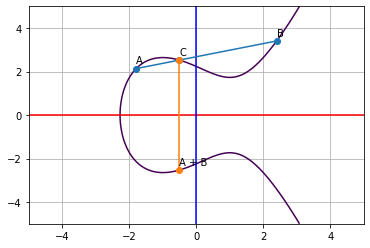

In [42]:
import matplotlib.pyplot as plt

a = -3
b = 5

y, x = np.ogrid[-5:5:100j, -5:5:100j]
z = pow(y, 2) - pow(x, 3) - x * a - b

plt.contour(x.ravel(), y.ravel(), z, [0])
plt.axhline(y=0, color='r')
plt.axvline(x=0, color='b')

p0 = Point(-1.8, y_value(a, b, -1.8))
p1 = Point(2.4, y_value(a, b, 2.4))
p2 = p0 + p1

line0 = np.array([
    p0.np(),
    p2.oppsite().np(),
    p1.np()
])
plt.plot(line0[:,0], line0[:,1], marker='o')
plt.annotate('A', xy=line0[0], xytext=(0, 5), textcoords='offset pixels')
plt.annotate('B', xy=line0[2], xytext=(0, 5), textcoords='offset pixels')
plt.annotate('C', xy=line0[1], xytext=(0, 5), textcoords='offset pixels')

line1 = np.array([
    p2.oppsite().np(),
    p2.np()
])
plt.plot(line1[:,0], line1[:,1], marker='o')
plt.annotate('A + B', xy=line1[1], xytext=(0, 5), textcoords='offset pixels')

plt.grid()
plt.show()